In [2]:
!pip install mglearn
!pip install Koreanize_matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.1 MB/s eta 0:00:00


# k-최근접 이웃 알고리즘

*   분류, 회귀 모델 모두 제공
*   훈련데이터셋에 가장 가까운 데이터포인트 찾기 -> 유유상종, 끼리끼리



## forge 데이터 셋 분류

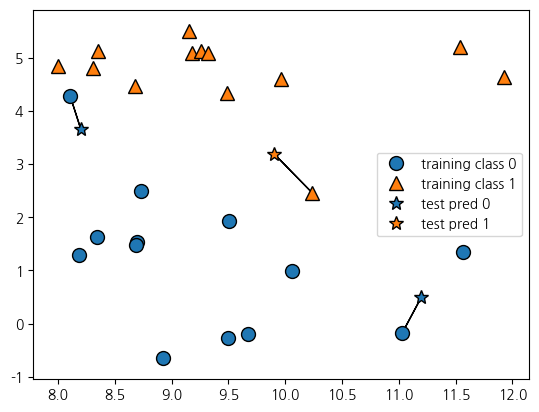

In [8]:
import mglearn
import koreanize_matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.figure(dpi=100)
# n_neighbors=1
mglearn.plots.plot_knn_classification(n_neighbors=1)


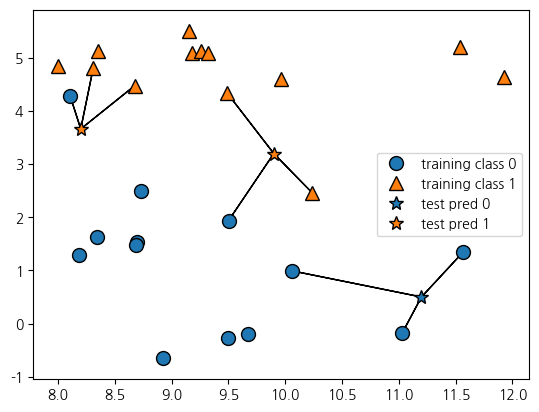

In [9]:
plt.figure(dpi=100)
# n_neighbors=1
mglearn.plots.plot_knn_classification(n_neighbors=3)


## forge 데이서셋을 활용한 이진분류문제 정의

### 데이터준비하기

In [10]:
X, y = mglearn.datasets.make_forge() # 데이터(독립변수, 특성, 문제집), y 레이블(타켓, 정답)

### 일반화 성능을 평가 할 수 있또록 데이터 분리 -> 훈련셋, 테스트셋

In [11]:
X.shape # 26 데이터, two target

(26, 2)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 7) # 75:25 default

In [14]:
X_train.shape

(19, 2)

In [15]:
X_test.shape

(7, 2)

### k- 최근접이웃 분류모델

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)


### 모델 학습하기

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### 모델 평가하기

In [27]:
knn.score(X_test, y_test)

0.8571428571428571

In [28]:
knn.score(X_train, y_train)

0.9473684210526315

## :KNeighborsClassifier 이웃의 수에 따른 성능평가를 해보자



1.   이웃의 수를 1~10까지 증가시켜서 학습 진행
2.   score () 를 통해서 예측 정확도를 저장
3.   차트를 활용하여 최적접 찾기



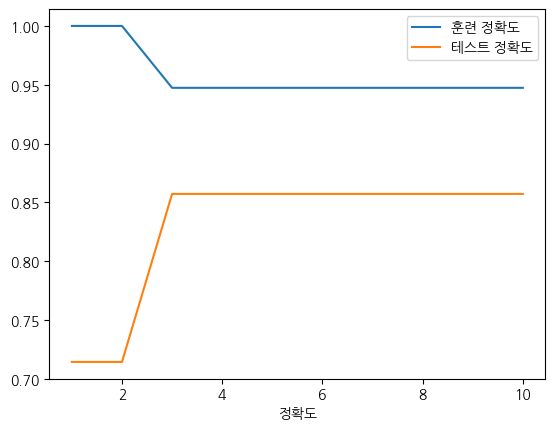

In [29]:
# 이웃의 수에 따른 정확도를 저장할 리스트 변수

train_scores = []
test_scores = []

# 이웃의 수  변수
n_neighbors_settings = range(1,11)

# 1~10 까지 n_neighbors의 수를 증가시켜 학습 후 정확도 저장
for n_neighbor in n_neighbors_settings:
  # 모델 생성 및 학습
  knn = KNeighborsClassifier(n_neighbors=n_neighbor)
  knn.fit(X_train, y_train)

  #훈련 데이터셋 정확도 저장
  train_scores.append(knn.score(X_train, y_train))

  # 텍스트데이터셋 정확도 저장
  test_scores.append(knn.score(X_test, y_test))

# 예측 정확도 비교 그래프 / 띄어쓰기, for문 안에 안 들어가게 조심하기
plt.figure(dpi=100)

plt.plot(n_neighbors_settings, train_scores, label="훈련 정확도")
plt.plot(n_neighbors_settings, test_scores, label ="테스트 정확도")
plt.xlabel('이웃의 수')
plt.xlabel('정확도')
plt.legend()
plt.show()

## 유방암 데이터셋을 활용한 이웃의 성능평가

### prepare data

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

In [31]:
cancer.data.shape

(569, 30)

### separate data

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 7)

In [33]:
X_train.shape

(426, 30)

In [34]:
X_test.shape

(143, 30)

### 1~20 까지 이웃의 수를 증가시켜 성능평가하기

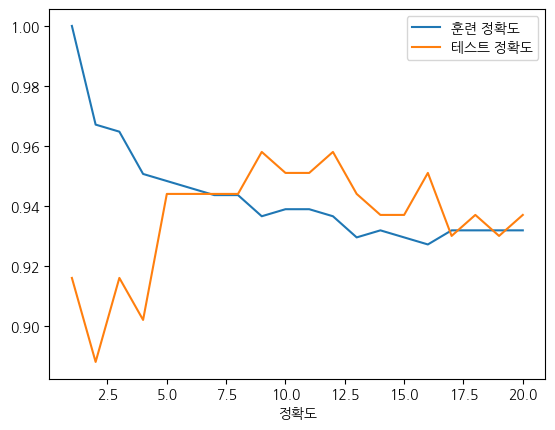

In [35]:
# 이웃의 수에 따른 정확도를 저장할 리스트 변수

train_scores = []
test_scores = []

# 이웃의 수  변수
n_neighbors_settings = range(1,21)

# 1~10 까지 n_neighbors의 수를 증가시켜 학습 후 정확도 저장
for n_neighbor in n_neighbors_settings:
  # 모델 생성 및 학습
  knn = KNeighborsClassifier(n_neighbors=n_neighbor)
  knn.fit(X_train, y_train)

  #훈련 데이터셋 정확도 저장
  train_scores.append(knn.score(X_train, y_train))

  # 텍스트데이터셋 정확도 저장
  test_scores.append(knn.score(X_test, y_test))

# 예측 정확도 비교 그래프 / 띄어쓰기, for문 안에 안 들어가게 조심하기
plt.figure(dpi=100)

plt.plot(n_neighbors_settings, train_scores, label="훈련 정확도")
plt.plot(n_neighbors_settings, test_scores, label ="테스트 정확도")
plt.xlabel('이웃의 수')
plt.xlabel('정확도')
plt.legend()
plt.show()

In [37]:
max(test_scores)

0.958041958041958

In [38]:
import seaborn as sns